In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/vaccination_tweets.csv")
print(data.head())

                    id             user_name              user_location  \
0  1340539111971516416            Rachel Roh  La Crescenta-Montrose, CA   
1  1338158543359250433           Albert Fong          San Francisco, CA   
2  1337858199140118533              eli🇱🇹🇪🇺👌                   Your Bed   
3  1337855739918835717         Charles Adler     Vancouver, BC - Canada   
4  1337854064604966912  Citizen News Channel                        NaN   

                                    user_description         user_created  \
0  Aggregator of Asian American news; scanning di...  2009-04-08 17:52:46   
1  Marketing dude, tech geek, heavy metal & '80s ...  2009-09-21 15:27:30   
2                                     heil, hydra 🖐☺  2020-06-25 23:30:28   
3  Hosting "CharlesAdlerTonight" Global News Radi...  2008-09-10 11:28:53   
4  Citizen News Channel bringing you an alternati...  2020-04-23 17:58:42   

   user_followers  user_friends  user_favourites  user_verified  \
0             405  

In [2]:
data.isnull().sum()

id                     0
user_name              0
user_location       1630
user_description     507
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            1949
source                 1
retweets               0
favorites              0
is_retweet             0
dtype: int64

In [ ]:
data = data.dropna()

In [11]:
print(data.describe())

NameError: name 'data' is not defined

In [12]:
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["text"] = data["text"].apply(clean)

<>:11: SyntaxWarning: invalid escape sequence '\['
<>:12: SyntaxWarning: invalid escape sequence '\S'
<>:16: SyntaxWarning: invalid escape sequence '\w'
<>:11: SyntaxWarning: invalid escape sequence '\['
<>:12: SyntaxWarning: invalid escape sequence '\S'
<>:16: SyntaxWarning: invalid escape sequence '\w'
C:\Users\kkrab\AppData\Local\Temp\ipykernel_3872\1372381321.py:11: SyntaxWarning: invalid escape sequence '\['
  text = re.sub('\[.*?\]', '', text)
C:\Users\kkrab\AppData\Local\Temp\ipykernel_3872\1372381321.py:12: SyntaxWarning: invalid escape sequence '\S'
  text = re.sub('https?://\S+|www\.\S+', '', text)
C:\Users\kkrab\AppData\Local\Temp\ipykernel_3872\1372381321.py:16: SyntaxWarning: invalid escape sequence '\w'
  text = re.sub('\w*\d\w*', '', text)
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kkrab\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


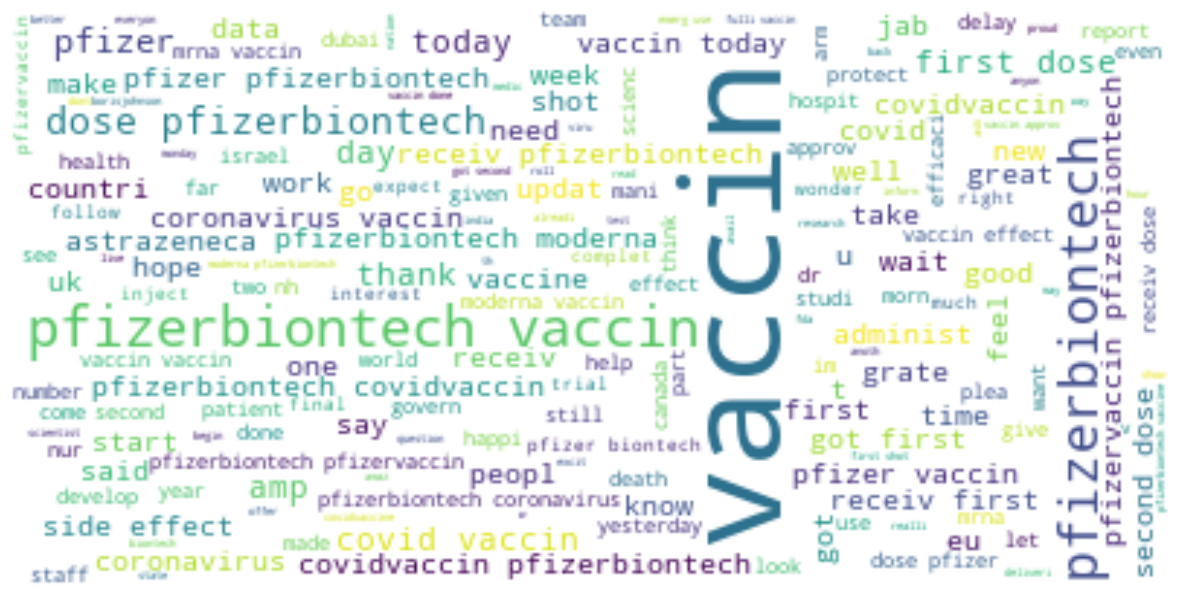

In [13]:
text = " ".join(i for i in data.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

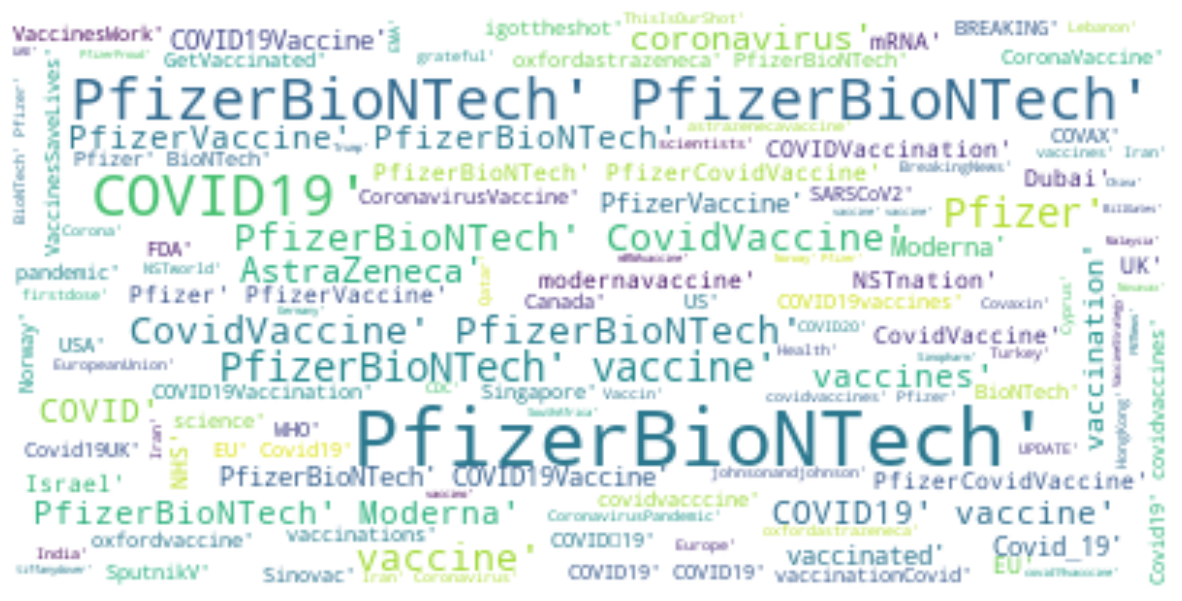

In [16]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

vtext = " ".join(str(i) for i in data.hashtags if not isinstance(i, float))
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(vtext)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [17]:
data["user_verified"].value_counts()

user_verified
False    7323
True      759
Name: count, dtype: int64

In [18]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["text"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["text"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["text"]]
data = data[["text", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\kkrab\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                                text  Positive  Negative  \
0  folk said daikon past could treat cytokin stor...     0.252     0.000   
1  world wrong side histori year hope biggest vac...     0.193     0.207   
2  coronavirus sputnikv astrazeneca pfizerbiontec...     0.000     0.000   
3  fact immut senat even your ethic sturdi enough...     0.000     0.000   
4  explain need vaccin borisjohnson matthancock w...     0.000     0.000   

   Neutral  
0    0.748  
1    0.600  
2    1.000  
3    1.000  
4    1.000  


In [19]:
def sentiment_score(a, b, c):
    if (a > b) and (a > c):
        return "Positive 😊 "
    elif (b > a) and (b > c):
        return "Negative 😠 "
    else:
        return "Neutral 🙂 "

x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

result = sentiment_score(x, y, z)
print(result)


Neutral 🙂 


In [20]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  743.187
Negative:  356.012
Neutral:  6982.802


##### Project_Accuracy

In [23]:
from sklearn.metrics import accuracy_score

# Assuming y_true are the true labels and y_pred are the predicted labels
y_true = [0, 1, 1, 0, 1]
y_pred = [0, 1, 0, 0, 1]

accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8


# Thank you